Wholesale distributors can get all kinds of insights to enhance their business by analyzing their customers' data. It is time for you to try a simple clustering analysis!
License: The dataset is CC0: Public Domain, and it is publicly available in the UCI Machine Learning Repository.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.


By the end of this mini project, you will need to deliver within your code:
Multiple Dunn-index measures resembling different k used for K-Means clustering your data.
An output plot of the elbow curve.
The best k chosen based on the elbow curve plot.
Output predicted clusters for the first 10 data samples.
You are expected to write around 45 lines of code to complete this project.

In [4]:
import os

os.chdir('c:\\Users\\cbeer\\Desktop\\data-science-learning\\python-for-machine-learning\\')

os.getcwd()

'c:\\Users\\cbeer\\Desktop\\data-science-learning\\python-for-machine-learning'

### Step 1: Download the dataset

Download the Dataset from the following link:
https://www.kaggle.com/binovi/wholesale-customers-data-set

### Step 2: Reading the dataset 

Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [48]:
import pandas as pd

dat = pd.read_csv("dat\\Wholesale customers data.csv")

dat # 440 rows × 8 columns ... no missing values

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Step 3: Feature selection

Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.

Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!


Let's check out how sales by differ by region and channel to make a call

In [38]:

dat_region = dat.loc[:, dat.columns != 'Channel']

dat_region = pd.melt(dat_region, id_vars = 'Region', value_name = "Sales", var_name = "Category")

dat_region

dat_channel = dat.loc[:, dat.columns != 'Region']

dat_channel = pd.melt(dat_channel, id_vars = 'Channel', value_name = "Sales", var_name = "Category")

dat_channel


,Channel,Category,Sales
0,2,Fresh,12669
1,2,Fresh,7057
2,2,Fresh,6353
3,1,Fresh,13265
4,2,Fresh,22615
...,...,...,...
2635,1,Delicassen,2204
2636,1,Delicassen,2346
2637,2,Delicassen,1867
2638,1,Delicassen,2125


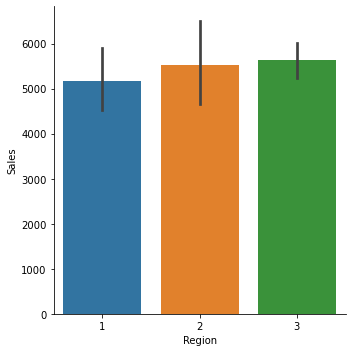

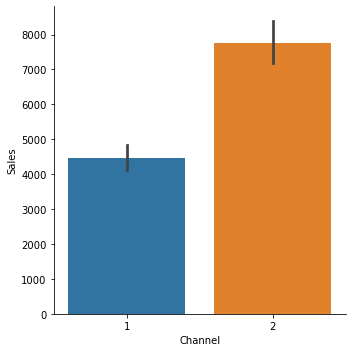

In [39]:
import seaborn as sns

p = sns.catplot(data = dat_region, kind = "bar", x = 'Region', y = 'Sales')

p_2 = sns.catplot(data = dat_channel, kind = "bar", x = 'Channel', y = 'Sales')

While it looks like region matters a bit, there's a huge difference between channels in terms of average sales (restaurant buyers vs consumers). I will use that as the catgeorical variable in my model. 

In [50]:
dat = dat.loc[:, dat.columns != 'Region'] # dropping region

dat

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


### Step 4: Preprocessing

- I need to encode Channel
- Don't think I need to do any scaling since all the other columns are measured in standard units

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dat.loc[:, 'Channel'] = encoder.fit_transform(dat['Channel'])

C:\Users\cbeer\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


### Step 5: Clustering using K-Means

In [70]:


from sklearn.cluster import KMeans

inertia = [0]*12

for k in range(1,12):

    model = KMeans(n_clusters=k, tol = 0.01, random_state=0)

    model.fit(dat)

    inertia[k] = model.inertia_


C:\Users\cbeer\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0,
 157595857261.78192,
 113217528616.20393,
 80342166991.7774,
 64924543307.81422,
 53020952095.260925,
 47273617321.39748,
 42103907035.54268,
 36663760796.81621,
 32775886131.222065,
 30083911354.737476,
 28552090069.950104]

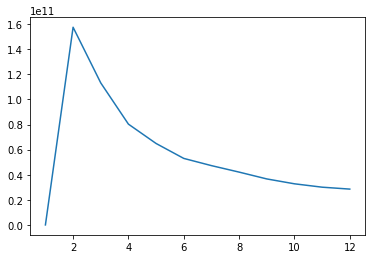

In [77]:
from matplotlib import pyplot as plt

k = range(1, 13)

plt.plot(k, inertia)



Let's call 6 our optimal # of k

In [79]:
model = KMeans(n_clusters=6, tol = 0.01, random_state=0)

clusters = model.fit_predict(dat)

print(clusters)

[0 3 3 0 0 3 0 3 3 4 4 0 5 0 5 3 4 3 0 3 0 3 5 4 0 0 3 0 4 5 0 3 0 5 3 3 5
 4 4 1 0 0 4 4 3 4 4 2 0 4 3 3 5 4 5 3 4 4 0 3 3 2 3 4 3 2 3 0 3 3 0 0 3 0
 3 0 3 4 0 3 3 4 4 0 0 2 2 5 3 5 0 0 4 0 4 3 3 3 3 3 4 4 3 1 0 0 3 4 3 4 0
 4 0 0 0 0 0 3 0 3 0 3 0 0 5 1 0 0 3 5 3 3 0 3 3 3 3 3 0 3 0 5 5 0 0 4 3 3
 3 5 0 3 0 3 3 4 4 0 3 4 3 0 0 4 3 4 3 3 3 3 4 4 3 4 3 4 5 0 0 3 0 1 4 1 3
 3 3 3 4 4 0 0 3 4 3 0 5 3 0 3 4 4 5 3 3 4 3 3 3 4 0 2 3 3 3 4 4 0 4 3 0 3
 3 3 3 0 0 3 3 3 0 3 5 3 0 3 3 0 3 5 0 0 0 0 3 4 3 0 0 3 3 4 3 5 0 5 0 3 1
 5 3 3 0 3 4 4 4 0 4 0 3 3 3 5 3 3 5 0 0 0 3 0 5 5 1 5 3 0 0 5 3 3 3 4 0 3
 0 3 3 3 0 4 3 4 4 4 4 0 3 4 3 5 4 3 0 4 3 3 0 4 3 3 0 0 5 1 3 3 0 3 3 4 0
 2 0 5 0 3 3 3 3 3 3 4 3 3 4 5 3 4 3 4 3 4 0 3 0 4 3 3 0 3 3 3 3 3 3 3 0 3
 5 0 3 0 3 3 4 5 3 3 5 0 5 3 4 0 3 0 3 3 3 3 3 0 0 3 3 0 0 3 3 5 5 5 0 3 5
 4 3 3 3 3 3 3 3 3 4 3 4 3 4 0 5 0 0 0 4 5 3 3 4 3 0 3 0 5 5 4 3 3]
